# Clase 06 - Ideando el storytelling: Desigualdad en Chile

Profesor: **Fernando Becerra**, f.becerra@udd.cl, [www.fernandobecerra.com](www.fernandobecerra.com)

##### Contexto

[Discurso del presidente Boric en las Nacionaes Unidas](https://www.youtube.com/watch?v=EfTYTHtspeQ): "Nos duele ser uno de los países más desiguales del mundo"

[Respuesta](https://www.latercera.com/opinion/noticia/es-chile-el-pais-mas-desigual-del-mundo/XYBKEGBTPBE3RB5NATYT4RNLSE/): "A partir de la última información disponible del Banco Mundial, en la región Colombia tiene un coeficiente de Gini de 54,2 (mayor el número es más desigual), Panamá (49,8), Costa Rica (49,3), Brasil (48,9), Guatemala (48,3), Honduras (48,2), Ecuador (47,3), Nicaragua (46,2), México (45,4), mientras Chile un 44,9."

Discusión en Twitter: [baja del Gini a través de los años](https://twitter.com/ignaciobriones_/status/1572957052846346240), [trayectoria del Gini vs GDP](https://twitter.com/OLanderretche/status/1574571809466458113) ([inspiración](http://i0.wp.com/michelbaudin.com/wp-content/uploads/2013/05/brazil-gini-versus-gdp-chart.jpg))


##### Objetivo
Hacer nuestro propio análisis más serio basado en la visualización y encontrar una historia que contar

Inspiración: [Our World in Data](https://ourworldindata.org/income-inequality)

Lo primero es lo primero: importar lo típico

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

[World Bank](https://pip.worldbank.org/poverty-calculator)

In [4]:
df = pd.read_csv('../datos/desigualdad/pip.csv')
df.head()


,region_name,region_code,country_name,country_code,reporting_year,reporting_level,survey_acronym,survey_coverage,survey_year,welfare_type,...,decile9,decile10,cpi,ppp,reporting_pop,reporting_gdp,reporting_pce,is_interpolated,distribution_type,estimation_type
0,Sub-Saharan Africa,SSA,Angola,AGO,2000,national,HBS,national,2000.21,consumption,...,0.158687,0.402455,0.014200,107.269989,16395477,2451.509826,NaN,False,micro,survey
1,Sub-Saharan Africa,SSA,Angola,AGO,2008,national,IBEP-MICS,national,2008.50,consumption,...,0.162333,0.323117,0.303449,107.269989,21695636,4077.776844,1620.065607,False,micro,survey
2,Sub-Saharan Africa,SSA,Angola,AGO,2018,national,IDREA,national,2018.17,consumption,...,0.159390,0.396244,1.231024,107.269989,30809787,3595.106667,2093.495848,False,micro,survey
3,Europe & Central Asia,ECA,Albania,ALB,1996,national,EWS,national,1996.00,consumption,...,0.148995,0.212156,0.399635,50.357372,3168033,1633.551572,1714.813416,False,micro,survey
4,Europe & Central Asia,ECA,Albania,ALB,2002,national,LSMS,national,2002.00,consumption,...,0.149251,0.254356,0.701637,50.357372,3051010,2247.497491,1685.368128,False,micro,survey


In [5]:
all_countries = df['country_name'].unique()

In [6]:
list(df.columns)

['region_name',
 'region_code',
 'country_name',
 'country_code',
 'reporting_year',
 'reporting_level',
 'survey_acronym',
 'survey_coverage',
 'survey_year',
 'welfare_type',
 'survey_comparability',
 'comparable_spell',
 'poverty_line',
 'headcount',
 'poverty_gap',
 'poverty_severity',
 'watts',
 'mean',
 'median',
 'mld',
 'gini',
 'polarization',
 'decile1',
 'decile2',
 'decile3',
 'decile4',
 'decile5',
 'decile6',
 'decile7',
 'decile8',
 'decile9',
 'decile10',
 'cpi',
 'ppp',
 'reporting_pop',
 'reporting_gdp',
 'reporting_pce',
 'is_interpolated',
 'distribution_type',
 'estimation_type']

In [7]:
df_chile = df[df['country_name'] == 'Chile']
df_chile

,region_name,region_code,country_name,country_code,reporting_year,reporting_level,survey_acronym,survey_coverage,survey_year,welfare_type,...,decile9,decile10,cpi,ppp,reporting_pop,reporting_gdp,reporting_pce,is_interpolated,distribution_type,estimation_type
322,Latin America & Caribbean,LAC,Chile,CHL,1987,national,CASEN,national,1987.0,income,...,0.160075,0.453914,0.141201,478.995697,12642917,4710.709892,2400.793312,False,micro,survey
323,Latin America & Caribbean,LAC,Chile,CHL,1990,national,CASEN,national,1990.0,income,...,0.154096,0.470505,0.265681,478.995697,13274617,5470.479736,2754.646852,False,micro,survey
324,Latin America & Caribbean,LAC,Chile,CHL,1992,national,CASEN,national,1992.0,income,...,0.149427,0.451959,0.356878,478.995697,13719818,6343.227129,3301.817823,False,micro,survey
325,Latin America & Caribbean,LAC,Chile,CHL,1994,national,CASEN,national,1994.0,income,...,0.155901,0.459067,0.435449,478.995697,14166346,6877.434435,3716.155714,False,micro,survey
326,Latin America & Caribbean,LAC,Chile,CHL,1996,national,CASEN,national,1996.0,income,...,0.156687,0.444274,0.501988,478.995697,14587367,7770.539111,4336.964275,False,micro,survey
327,Latin America & Caribbean,LAC,Chile,CHL,1998,national,CASEN,national,1998.0,income,...,0.157075,0.449718,0.556358,478.995697,14977736,8481.752131,4766.270043,False,micro,survey
328,Latin America & Caribbean,LAC,Chile,CHL,2000,national,CASEN,national,2000.0,income,...,0.154262,0.425819,0.597324,478.995697,15342350,8685.321794,4797.305129,False,micro,survey
329,Latin America & Caribbean,LAC,Chile,CHL,2003,national,CASEN,national,2003.0,income,...,0.154101,0.413543,0.639934,478.995697,15849649,9321.218536,5059.241111,False,micro,survey
330,Latin America & Caribbean,LAC,Chile,CHL,2006,national,CASEN,national,2006.0,income,...,0.155561,0.378933,0.694008,478.995697,16354507,10887.863776,6144.546774,False,micro,survey
331,Latin America & Caribbean,LAC,Chile,CHL,2009,national,CASEN,national,2009.0,income,...,0.151857,0.382195,0.784435,478.995697,16886184,11273.617502,6579.528584,False,micro,survey


[gráfico de Briones](https://twitter.com/ignaciobriones_/status/1572957052846346240)

<Axes: xlabel='reporting_year'>

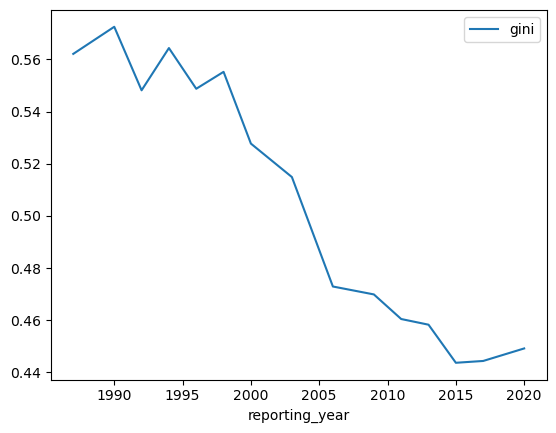

In [8]:
df_chile.plot(x='reporting_year', y='gini')

[gráfico de Landerretche](https://twitter.com/OLanderretche/status/1574571809466458113) y [Kaiser](https://twitter.com/AXELKAISER/status/1575141702091780096)

<Axes: xlabel='reporting_gdp'>

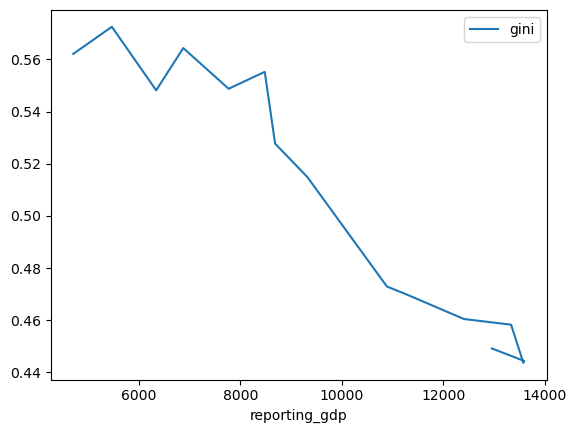

In [9]:
df_chile.plot(x='reporting_gdp', y='gini')

## Parte 2: Contexto latinoamericano

In [10]:
df['region_name'].unique()

array(['Sub-Saharan Africa', 'Europe & Central Asia',
       'Other High Income Countries', 'Latin America & Caribbean',
       'South Asia', 'East Asia & Pacific', 'Middle East & North Africa'],
      dtype=object)

In [11]:
df_lac = df[df['region_name'] == 'Latin America & Caribbean']
df_lac.head()

,region_name,region_code,country_name,country_code,reporting_year,reporting_level,survey_acronym,survey_coverage,survey_year,welfare_type,...,decile9,decile10,cpi,ppp,reporting_pop,reporting_gdp,reporting_pce,is_interpolated,distribution_type,estimation_type
19,Latin America & Caribbean,LAC,Argentina,ARG,1980,urban,EPH,urban,1980.0,income,...,0.163836,0.301754,0.054894,10.80794,23122598,10318.182985,NaN,False,group,survey
20,Latin America & Caribbean,LAC,Argentina,ARG,1986,urban,EPH,urban,1986.0,income,...,0.163225,0.322081,0.014070,10.80794,26230730,9412.994813,NaN,False,micro,survey
21,Latin America & Caribbean,LAC,Argentina,ARG,1987,urban,EPH,urban,1987.0,income,...,0.163314,0.342519,0.032549,10.80794,26769634,9517.108610,NaN,False,micro,survey
22,Latin America & Caribbean,LAC,Argentina,ARG,1991,urban,EPH,urban,1991.0,income,...,0.159374,0.366093,328.909183,10.80794,28887231,8769.750400,NaN,False,micro,survey
23,Latin America & Caribbean,LAC,Argentina,ARG,1992,urban,EPH,urban,1992.0,income,...,0.165745,0.342871,0.038808,10.80794,29352237,9338.699517,NaN,False,micro,survey


In [12]:
countries = df_lac['country_name'].unique()
countries

array(['Argentina', 'Belize', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
       'Costa Rica', 'Dominican Republic', 'Ecuador', 'Guatemala',
       'Guyana', 'Honduras', 'Haiti', 'Jamaica', 'St. Lucia', 'Mexico',
       'Nicaragua', 'Panama', 'Peru', 'Paraguay', 'El Salvador',
       'Suriname', 'Trinidad and Tobago', 'Uruguay', 'Venezuela, RB'],
      dtype=object)

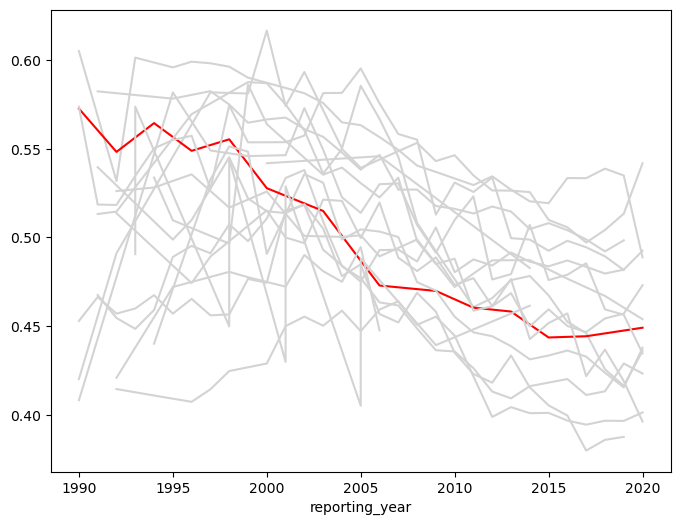

In [13]:
countries = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
       'Costa Rica', 'Dominican Republic', 'Ecuador', 'Guatemala', 'Honduras', 'Mexico',
       'Nicaragua', 'Panama', 'Peru', 'Paraguay', 'El Salvador', 'Uruguay', 'Venezuela, RB']

fig, ax = plt.subplots(1,1, figsize=(8,6))

for country in countries:
    df_country = df_lac[(df_lac['country_name'] == country) & (df_lac['reporting_year'] >= 1990)]
    color = 'red' if country == 'Chile' else 'lightgray'
    df_country.plot(x='reporting_year', y='gini', color=color, ax=ax, legend=False)

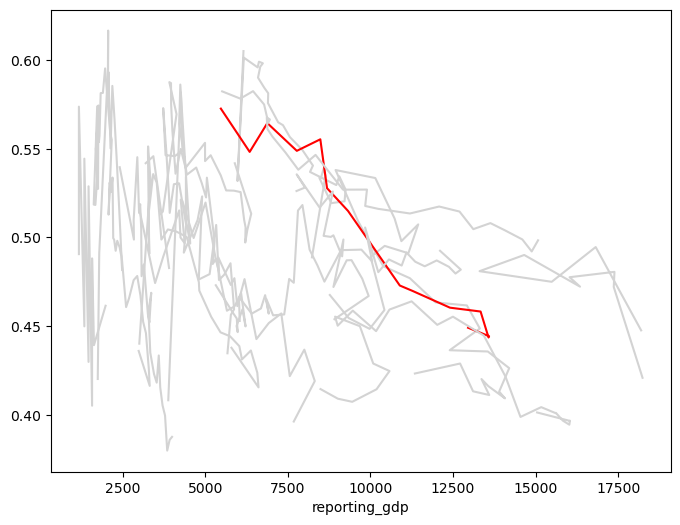

In [14]:
countries = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
       'Costa Rica', 'Dominican Republic', 'Ecuador', 'Guatemala', 'Honduras', 'Mexico',
       'Nicaragua', 'Panama', 'Peru', 'Paraguay', 'El Salvador', 'Uruguay', 'Venezuela, RB']

fig, ax = plt.subplots(1,1, figsize=(8,6))

for country in countries:
    df_country = df_lac[(df_lac['country_name'] == country) & (df_lac['reporting_year'] >= 1990)]
    color = 'red' if country == 'Chile' else 'lightgray'
    df_country.plot(x='reporting_gdp', y='gini', color=color, ax=ax, legend=False)

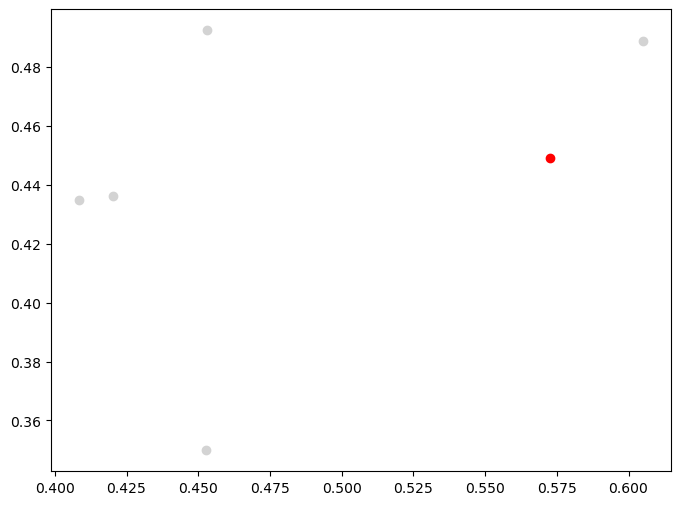

In [15]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

for country in all_countries:
    df_1990 = df[(df['country_name'] == country) & (df['reporting_year'] == 1990)]
    df_2020 = df[(df['country_name'] == country) & (df['reporting_year'] == 2020)]
    if (df_1990.shape[0] != 1 or df_2020.shape[0] != 1):
        continue
    color = 'red' if country == 'Chile' else 'lightgray'
    ax.scatter(df_1990['gini'], df_2020['gini'], color=color)
    
plt.show()

[OWID data](https://ourworldindata.org/grapher/gini-index-of-income-in-2015-vs-1990-gcip-including-non-survey-years)

In [18]:
df_gini = pd.read_csv("../datos/desigualdad/gini-index-of-income-in-2015-vs-1990-gcip-including-non-survey-years.csv")
df_gini.head()

,Entity,Code,Year,Gini index of income in 2015 (inc. non-survey years),Gini index of income in 1990 (inc. non-survey years),Population (historical estimates),Country grouping
0,Afghanistan,AFG,2015,36.81118,36.81118,33753500,Eastern Europe and Central Asia
1,Afghanistan,AFG,-10000,NaN,NaN,14737,NaN
2,Afghanistan,AFG,-9000,NaN,NaN,20405,NaN
3,Afghanistan,AFG,-8000,NaN,NaN,28253,NaN
4,Afghanistan,AFG,-7000,NaN,NaN,39120,NaN


In [19]:
df_gini['Country grouping'].unique()

array(['Eastern Europe and Central Asia', nan,
       'Middle East and North Africa', 'Sub-Saharan Africa',
       'Latin America and Caribbean', 'Advanced industrial economies',
       'South Asia', 'East Asia and Pacific'], dtype=object)

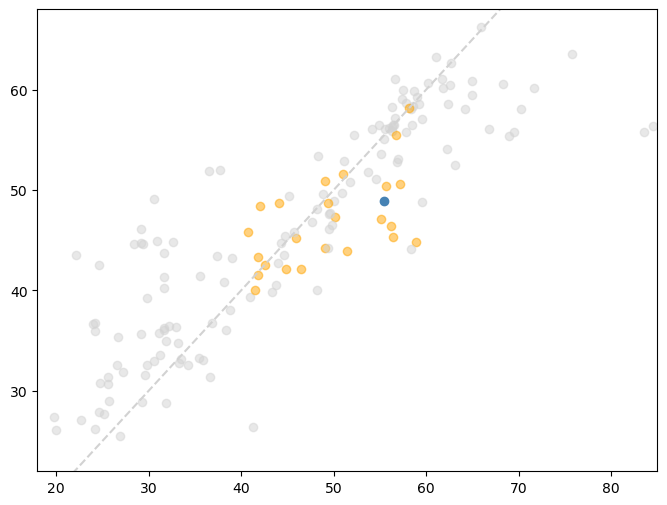

In [20]:
fig, ax = plt.subplots(1,1, figsize=(8,6)) 
xmin, xmax = 18, 85

for country in df_gini['Entity'].unique():
    df_country = df_gini[(df_gini['Entity'] == country)]
    x = df_country[df_country['Year'] == 2015]['Gini index of income in 1990 (inc. non-survey years)'].item()
    y = df_country[df_country['Year'] == 2015]['Gini index of income in 2015 (inc. non-survey years)'].item()
    if country == 'Chile':
        color = 'steelblue'
        alpha = 1.0
    elif df_country[df_country['Year'] == 2015]['Country grouping'].item() == 'Latin America and Caribbean':
        color = 'orange'
        alpha = 0.5
    else:
        color = 'lightgray'
        alpha = 0.5
    ax.scatter(x, y, color=color, alpha=alpha)
    
ax.plot([xmin, xmax], [xmin, xmax], '--', color='#d2d2d2')
ax.set_xlim([xmin, xmax])
ax.set_ylim([22, 68])
plt.show()
    

## Parte 3: Perros grandes

[datos OCDE](https://stats.oecd.org/Index.aspx?DataSetCode=IDD)

In [23]:
df_ocde = pd.read_csv('../datos/desigualdad/IDD_30092022043102297.csv')
df_ocde.head()

,LOCATION,Country,MEASURE,Measure,AGE,Age group,DEFINITION,Definition,METHODO,Methodology,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2012,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.326,NaN,NaN
1,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2014,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.337,NaN,NaN
2,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2016,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.330,NaN,NaN
3,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2018,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.325,NaN,NaN
4,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2011,Income definition until 2011,...,2004,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.315,NaN,NaN


In [24]:
ocde_countries = df_ocde['LOCATION'].unique()
ocde_countries

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'CHL', 'EST', 'ISR', 'RUS', 'SVN', 'LVA',
       'LTU', 'BRA', 'CHN', 'CRI', 'IND', 'ZAF', 'BGR', 'ROU'],
      dtype=object)

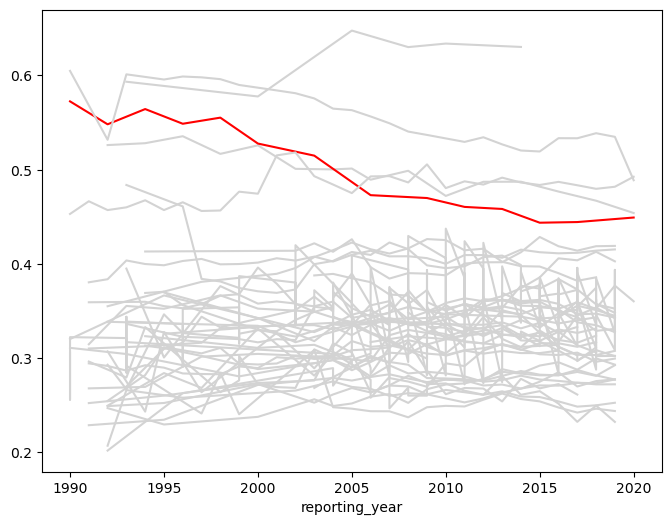

In [25]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

for country in ocde_countries:
    df_country = df[(df['country_code'] == country) & (df['reporting_year'] >= 1990)]
    color = 'red' if country == 'CHL' else 'lightgray'
    df_country.plot(x='reporting_year', y='gini', color=color, ax=ax, legend=False)

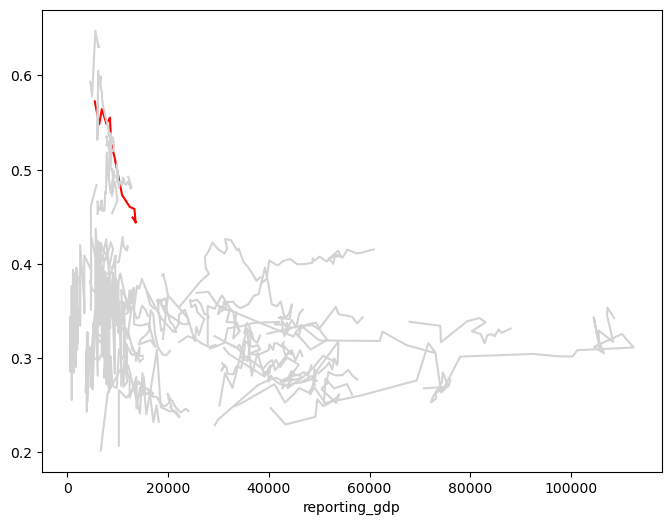

In [26]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

for country in ocde_countries:
    df_country = df[(df['country_code'] == country) & (df['reporting_year'] >= 1990)]
    color = 'red' if country == 'CHL' else 'lightgray'
    df_country.plot(x='reporting_gdp', y='gini', color=color, ax=ax, legend=False)

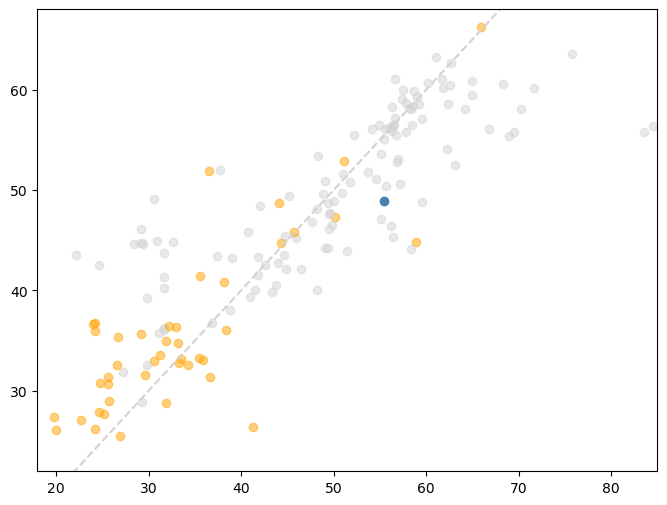

In [27]:
fig, ax = plt.subplots(1,1, figsize=(8,6)) 
xmin, xmax = 18, 85

for country in df_gini['Entity'].unique():
    df_country = df_gini[(df_gini['Entity'] == country)]
    x = df_country[df_country['Year'] == 2015]['Gini index of income in 1990 (inc. non-survey years)'].item()
    y = df_country[df_country['Year'] == 2015]['Gini index of income in 2015 (inc. non-survey years)'].item()
    if country == 'Chile':
        color = 'steelblue'
        alpha = 1.0
    elif df_country[df_country['Year'] == 2015]['Code'].item() in ocde_countries:
        color = 'orange'
        alpha = 0.5
    else:
        color = 'lightgray'
        alpha = 0.5
    ax.scatter(x, y, color=color, alpha=alpha)
    
ax.plot([xmin, xmax], [xmin, xmax], '--', color='#d2d2d2')
ax.set_xlim([xmin, xmax])
ax.set_ylim([22, 68])
plt.show()
    

## Parte 4: Datos OCDE

In [28]:
df_ocde.head()

,LOCATION,Country,MEASURE,Measure,AGE,Age group,DEFINITION,Definition,METHODO,Methodology,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2012,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.326,NaN,NaN
1,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2014,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.337,NaN,NaN
2,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2016,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.330,NaN,NaN
3,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2018,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.325,NaN,NaN
4,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2011,Income definition until 2011,...,2004,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.315,NaN,NaN


In [29]:
df_ocde.columns

Index(['LOCATION', 'Country', 'MEASURE', 'Measure', 'AGE', 'Age group',
       'DEFINITION', 'Definition', 'METHODO', 'Methodology', 'TIME', 'Year',
       'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')

In [30]:
df_ocde['METHODO'].unique()

array(['METH2012', 'METH2011'], dtype=object)

In [31]:
df_ocde['Measure'].unique()

array(['Gini (disposable income, post taxes and transfers)',
       'Consumer Price Index (base 2010=100)',
       'Age group 0-17: Poverty rate after taxes and transfers',
       'Total earnings (current prices)',
       'Income from self-employment (current prices)',
       'Taxes and social security contributions paid directly by households (Current prices)',
       'Age group 0-17: mean disposable income (current prices)',
       'Age group 18-25: mean disposable income (current prices)',
       'Capital income (current prices)',
       'Age group 18-25: Poverty rate after taxes and transfers',
       'Purchasing Power Parities for private consumption',
       'Standard error Gini (post taxes and transfers)',
       'Mean disposable income (current prices)',
       'Gini (market income, before taxes and transfers)',
       'Age group 26-40: Poverty rate after taxes and transfers',
       'Income from self-employment and from goods produced for own consumption (current prices)',
   

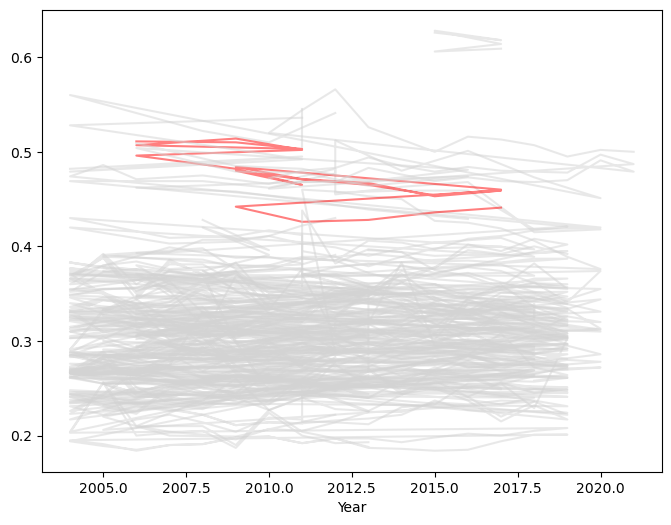

In [32]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

for country in ocde_countries:
    df_country = df_ocde[(df_ocde['LOCATION'] == country)
                         & (df_ocde['Year'] >= 1990)
                         & (df_ocde['Measure'] == 'Gini (disposable income, post taxes and transfers)')]
    color = 'red' if country == 'CHL' else 'lightgray'
    df_country.plot(x='Year', y='Value', color=color, ax=ax, legend=False, alpha=0.5)

In [33]:
df_country

,LOCATION,Country,MEASURE,Measure,AGE,Age group,DEFINITION,Definition,METHODO,Methodology,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
69457,ROU,Romania,GINI,"Gini (disposable income, post taxes and transf...",OLD,Retirement age population: above 65,CURRENT,Current definition,METH2012,New income definition since 2012,...,2006,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.344,NaN,NaN
69458,ROU,Romania,GINI,"Gini (disposable income, post taxes and transf...",OLD,Retirement age population: above 65,CURRENT,Current definition,METH2012,New income definition since 2012,...,2007,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.321,NaN,NaN
69459,ROU,Romania,GINI,"Gini (disposable income, post taxes and transf...",OLD,Retirement age population: above 65,CURRENT,Current definition,METH2012,New income definition since 2012,...,2008,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.302,NaN,NaN
69460,ROU,Romania,GINI,"Gini (disposable income, post taxes and transf...",OLD,Retirement age population: above 65,CURRENT,Current definition,METH2012,New income definition since 2012,...,2009,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.290,NaN,NaN
69461,ROU,Romania,GINI,"Gini (disposable income, post taxes and transf...",OLD,Retirement age population: above 65,CURRENT,Current definition,METH2012,New income definition since 2012,...,2010,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.293,NaN,NaN
69462,ROU,Romania,GINI,"Gini (disposable income, post taxes and transf...",OLD,Retirement age population: above 65,CURRENT,Current definition,METH2012,New income definition since 2012,...,2011,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.298,NaN,NaN
69463,ROU,Romania,GINI,"Gini (disposable income, post taxes and transf...",OLD,Retirement age population: above 65,CURRENT,Current definition,METH2012,New income definition since 2012,...,2012,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.307,NaN,NaN
69464,ROU,Romania,GINI,"Gini (disposable income, post taxes and transf...",OLD,Retirement age population: above 65,CURRENT,Current definition,METH2012,New income definition since 2012,...,2013,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.319,NaN,NaN
69465,ROU,Romania,GINI,"Gini (disposable income, post taxes and transf...",OLD,Retirement age population: above 65,CURRENT,Current definition,METH2012,New income definition since 2012,...,2014,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.383,NaN,NaN
69466,ROU,Romania,GINI,"Gini (disposable income, post taxes and transf...",OLD,Retirement age population: above 65,CURRENT,Current definition,METH2012,New income definition since 2012,...,2015,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.295,NaN,NaN


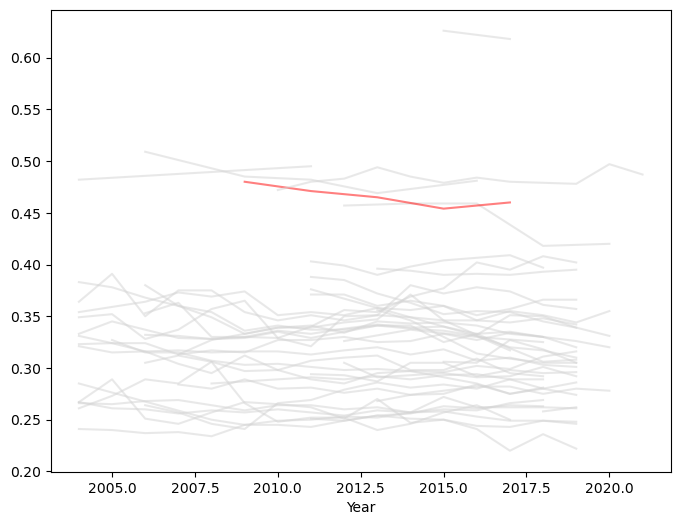

In [34]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

for country in ocde_countries:
# for country in ['CHL']:

    df_country = df_ocde[(df_ocde['LOCATION'] == country)
                         & (df_ocde['Year'] >= 1990)
                         & (df_ocde['Measure'] == 'Gini (disposable income, post taxes and transfers)')
                         & (df_ocde['AGE'] == 'TOT')
                         & (df_ocde['METHODO'] == 'METH2012')]
    color = 'red' if country == 'CHL' else 'lightgray'
    df_country.plot(x='Year', y='Value', color=color, ax=ax, legend=False, alpha=0.5)

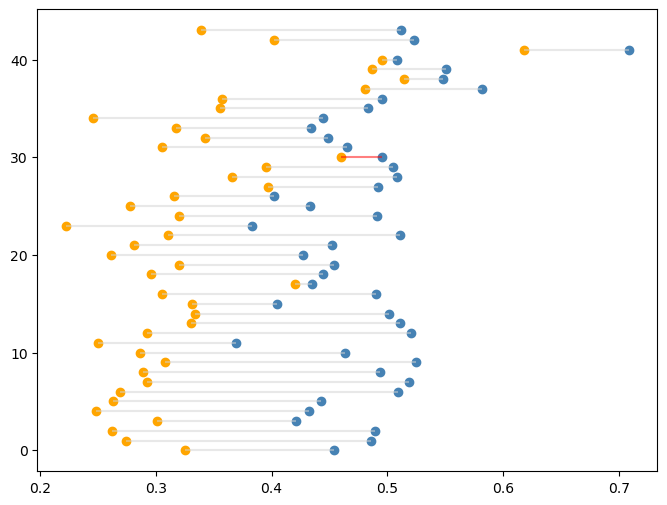

In [35]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

for idx_country, country in enumerate(ocde_countries):

    df_after = df_ocde[(df_ocde['LOCATION'] == country)
                         & (df_ocde['Year'] >= 1990)
                         & (df_ocde['Measure'] == 'Gini (disposable income, post taxes and transfers)')
                         & (df_ocde['AGE'] == 'TOT')
                         & (df_ocde['METHODO'] == 'METH2012')]
    value_after = df_after.iloc[-1]['Value']
    
    df_before = df_ocde[(df_ocde['LOCATION'] == country)
                         & (df_ocde['Year'] >= 1990)
                         & (df_ocde['Measure'] == 'Gini (market income, before taxes and transfers)')
                         & (df_ocde['AGE'] == 'TOT')
                         & (df_ocde['METHODO'] == 'METH2012')]
    value_before = df_before.iloc[-1]['Value']
    
    color = 'red' if country == 'CHL' else 'lightgray'
    
    ax.hlines(idx_country, value_before, value_after, colors=[color], alpha=0.5)
    ax.scatter([value_before], [idx_country], color="steelblue")
    ax.scatter([value_after], [idx_country], color="orange")

In [36]:
countries = []
before = []
after = []

df = pd.DataFrame()

for idx_country, country in enumerate(ocde_countries):
    
    countries.append(country)

    df_after = df_ocde[(df_ocde['LOCATION'] == country)
                         & (df_ocde['Year'] >= 1990)
                         & (df_ocde['Measure'] == 'Gini (disposable income, post taxes and transfers)')
                         & (df_ocde['AGE'] == 'TOT')
                         & (df_ocde['METHODO'] == 'METH2012')]
    after.append(df_after.iloc[-1]['Value'])
    
    df_before = df_ocde[(df_ocde['LOCATION'] == country)
                         & (df_ocde['Year'] >= 1990)
                         & (df_ocde['Measure'] == 'Gini (market income, before taxes and transfers)')
                         & (df_ocde['AGE'] == 'TOT')
                         & (df_ocde['METHODO'] == 'METH2012')]
    before.append(df_before.iloc[-1]['Value'])
    
df['country'] = countries
df['before'] = before
df['after'] = after
df['gap'] = df['before'] - df['after']

df.head()

,country,before,after,gap
0,AUS,0.454,0.325,0.129
1,AUT,0.486,0.274,0.212
2,BEL,0.489,0.262,0.227
3,CAN,0.421,0.301,0.120
4,CZE,0.432,0.248,0.184


In [37]:
by_after = df.sort_values('after').reset_index()
by_gap = df.sort_values('gap', ascending=False).reset_index()

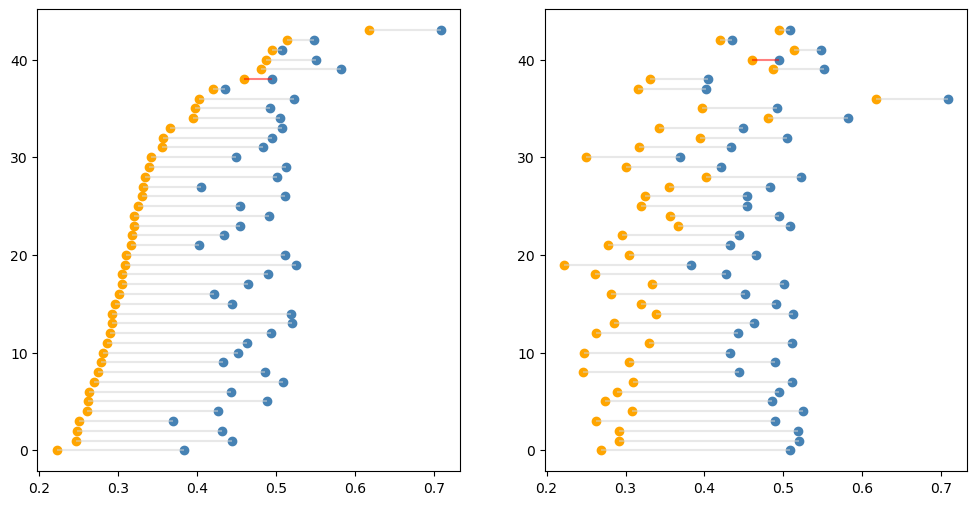

In [38]:
def plot_gini(df, ax):
    
    for idx_row, row in df.iterrows():
        
        color = 'red' if row['country'] == 'CHL' else 'lightgray'

        value_before = row['before']
        value_after = row['after']
        ax.hlines(idx_row, value_before, value_after, colors=[color], alpha=0.5)
        ax.scatter([value_before], [idx_row], color="steelblue")
        ax.scatter([value_after], [idx_row], color="orange")
    
    
fig, ax = plt.subplots(1,2,figsize=(12,6))
plot_gini(by_after, ax[0])
plot_gini(by_gap, ax[1])

plt.show()


## Parte 5: Distribución de ingresos

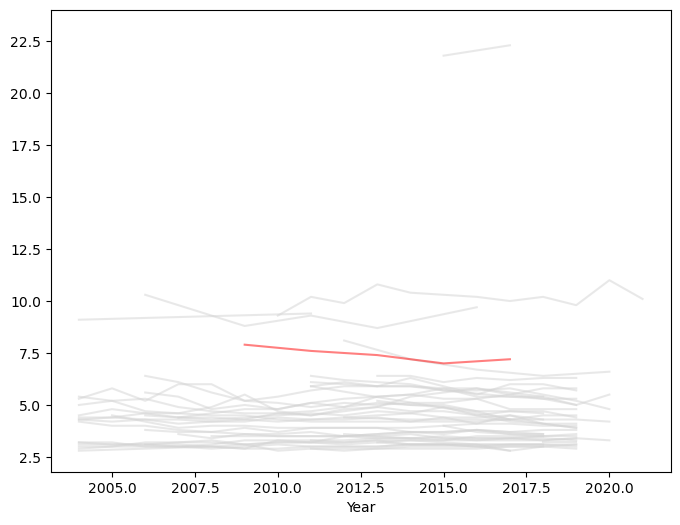

In [39]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

for country in ocde_countries:

    df_country = df_ocde[(df_ocde['LOCATION'] == country)
                         & (df_ocde['Year'] >= 1990)
                         & (df_ocde['Measure'] == 'P90/P10 disposable income decile ratio')
                         & (df_ocde['AGE'] == 'TOT')
                         & (df_ocde['METHODO'] == 'METH2012')]
    color = 'red' if country == 'CHL' else 'lightgray'
    df_country.plot(x='Year', y='Value', color=color, ax=ax, legend=False, alpha=0.5)

In [40]:
years = []
decile_distribution = {}
deciles = [x for x in df_chile.columns if 'decile' in x]
for decile in deciles:
    decile_distribution[decile] = []

for idx, row in df_chile.iterrows():
    years.append(row['reporting_year'])
    for decile in deciles:
        decile_distribution[decile].append(row[decile])

In [41]:
decile_distribution

{'decile1': [0.0116019492355596,
  0.0118553955273044,
  0.0143104217527041,
  0.0122909713183081,
  0.0133235354985257,
  0.0125389539604489,
  0.013084670194383,
  0.0138081354912954,
  0.0185468893648728,
  0.019279423863461,
  0.0205096688050581,
  0.0214351527227739,
  0.0223997074876653,
  0.0226161399622648,
  0.020621702524623],
 'decile2': [0.0218358060539591,
  0.021696968760948,
  0.0241730402998276,
  0.0223053614724533,
  0.0231710301933902,
  0.0225651331076592,
  0.0252069888982955,
  0.0262896764215879,
  0.0310919011184767,
  0.0323946965708239,
  0.0329379434330706,
  0.0337441146929893,
  0.0350143089439125,
  0.0350338370540364,
  0.0341261530692532],
 'decile3': [0.0294248948050559,
  0.0289412320735623,
  0.0319152438977235,
  0.0297331369176112,
  0.0311599028026939,
  0.0304616985626497,
  0.0339971852667012,
  0.0351048674447191,
  0.0401613315077447,
  0.0410012838477892,
  0.0418370544537457,
  0.0421283871355779,
  0.0439962762359756,
  0.0440363767266668,
 

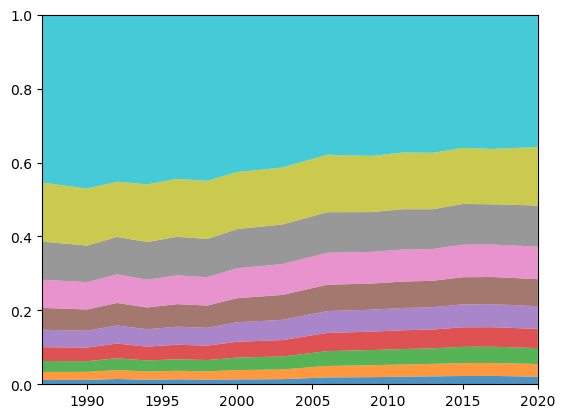

In [42]:
fig, ax = plt.subplots()
ax.stackplot(years, decile_distribution.values(),
             labels=decile_distribution.keys(),
             alpha=0.8)
# ax.legend(loc='upper left')

ax.set_xlim(1987, 2020)
ax.set_ylim(0, 1)

plt.show()

## Parte 6: Otros puntos de vista

[estos](https://twitter.com/cristobalotero/status/1192150305871253505) [dos](https://twitter.com/_Ignacio_Flores/status/1573179884020662275) hilos de Twitter

[World Inequality Database](https://wid.world)